In [1]:
%matplotlib inline
import ipymd

In [2]:
data = ipymd.data_input.lammps.LAMMPS_Output(
    sys_path=ipymd.get_test_path('system.dump'),
    atom_path=ipymd.get_test_path(['atom_dump','atoms_*.dump']))

In [3]:
sys_data = data.get_system_data()
sys_data.tail()

,time,natoms,a,b,vol,press,temp,peng,keng,teng,enth
94,18800,5880,4.000919,4.000920,106961.684112,3984.476256,20.821004,-576758.385663,364.871078,-576393.514586,-570178.024689
95,19000,5880,4.002667,4.002667,107055.104770,3457.822223,20.543535,-576743.788115,360.008650,-576383.779465,-570985.120033
96,19200,5880,3.995696,3.995696,106682.545808,1880.020740,14.949236,-576635.072775,261.973143,-576373.099632,-573448.059018
97,19400,5880,3.990131,3.990134,106385.666301,499.341106,21.315529,-576735.710976,373.537223,-576362.173753,-575587.433134
98,19600,5880,3.979611,3.979609,105825.294988,-2300.315883,17.161320,-576652.409368,300.738098,-576351.671270,-579901.871560


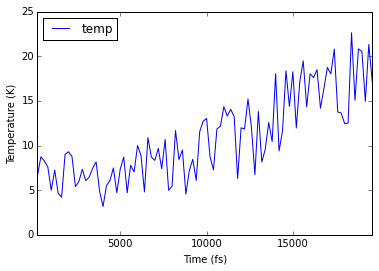

In [4]:
ax = sys_data.plot('time','temp')
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Temperature (K)');

In [5]:
print data.get_atom_timestep(98)
atom_data = data.get_atom_data(98)
sim_abc, sim_origin = data.get_simulation_box(98)
atom_data.head()

9800


,id,type,xs,ys,zs,mass,q
0,259,1,-27.857561,-21.882633,7.196651,55.845,-1.505560e-07
1,267,1,-27.861259,-25.857124,7.188060,55.845,-2.182330e-07
2,269,1,-25.863859,-23.880771,7.181207,55.845,-2.916280e-07
3,271,1,-23.879500,-21.886533,7.184821,55.845,-2.084570e-07
4,279,1,-25.866796,-27.853247,7.182366,55.845,-1.888220e-07


In [6]:
print sim_abc
print sim_origin

[[ 55.7146   0.       0.    ]
 [  0.      55.7146   0.    ]
 [  0.       0.      34.092 ]]
[-27.8573 -27.8573   0.    ]


In [7]:
vis = ipymd.visualise_sim.Visualise_Sim()
vis.add_atoms(atom_data, type_map={1:'Fe'})
vis.add_box(sim_abc, sim_origin)
vis.add_axes()

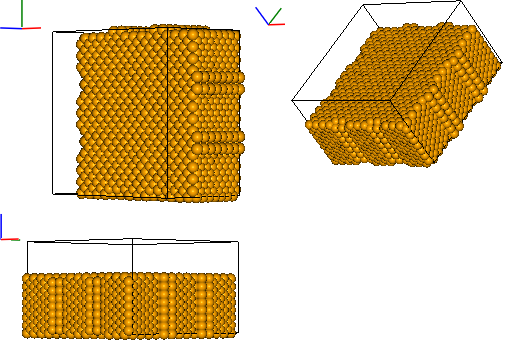

In [8]:
images = [vis.get_image(xrot=xrot,yrot=45) for xrot in [0,45,90]]
vis.visualise(images, columns=2)

In [9]:
data = ipymd.data_input.crystal.Crystal(
    [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]], ['Na', 'Cl'], 
    225, cellpar=[.54, .54, .54, 90, 90, 90], 
    repetitions=[5, 5, 5])

In [10]:
vis2 = ipymd.visualise_sim.Visualise_Sim()
vis2.add_box(*data.get_simulation_box())
vis2.add_axes()
atoms_df = data.get_atom_data()
vis2.add_atoms(atoms_df[atoms_df.type == 'Na'])
vis2.add_atoms(atoms_df[atoms_df.type == 'Cl'], alpha=0.2)
vis2.change_atom_radiimap({'Xx':0.1})

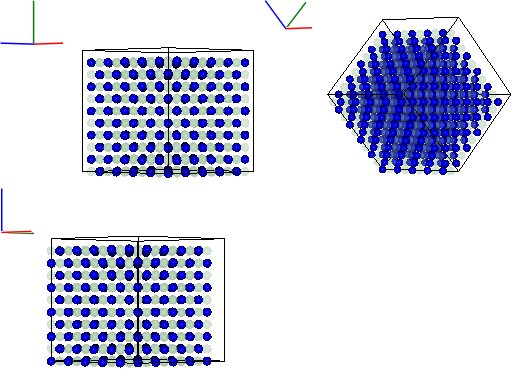

In [11]:
images = [vis2.get_image(xrot=xrot,yrot=45) for xrot in [0,45,90]]
vis2.visualise(images, columns=2)

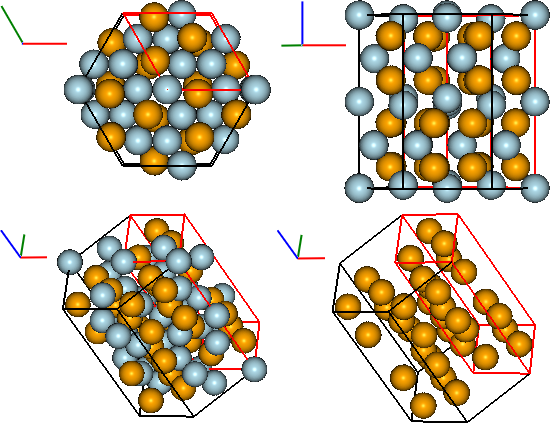

In [12]:
data = ipymd.data_input.lammps.LAMMPS_Input(ipymd.get_test_path('crystal_data.data'))
atom_df = data.get_atom_data('charge')
sim_abc, sim_origin = data.get_simulation_box()

atom_manip = ipymd.atom_manipulation.Atom_Manipulation
new_df = atom_manip(atom_df)
new_df.repeat_cell(sim_abc,repetitions=((-2,2),(-2,2),(-1,1)))
new_df.change_variables({1:'Fe',2:'S'}, vtype='type')
new_df.filter_inside_hexagon(sim_abc[[0,2]], sim_origin)

vis3 = ipymd.visualise_sim.Visualise_Sim()
vis3.change_atom_radiimap({'Xx':0.1})
vis3.change_atom_colormap({'Xx':'red','Fe':'orange','S':'light_blue'},colorstrs=True)
vis3.add_box(sim_abc,sim_origin,width=2, color='red')
vis3.add_axes(sim_abc, length=0.3,offset=(-0.4,-0.2),width=2)
vis3.add_hexagon(sim_abc[[0,2]],sim_origin, width=2)
vis3.add_atoms(new_df.df)

img1 = vis3.get_image(xrot=0,yrot=0,fov=5,height=500,width=500)
img2 = vis3.get_image(xrot=90,yrot=0,fov=5,height=500,width=500)
img3 = vis3.get_image(xrot=45,yrot=45,fov=5,height=500,width=500)

vis3.remove_atoms()
new_df.filter_variables('Fe', vtype='type')
vis3.add_atoms(new_df.df)
img4 = vis3.get_image(xrot=45,yrot=45,fov=5,height=500,width=500)

#img.save('test.png')
vis3.visualise([img1,img2,img3,img4],columns=2)

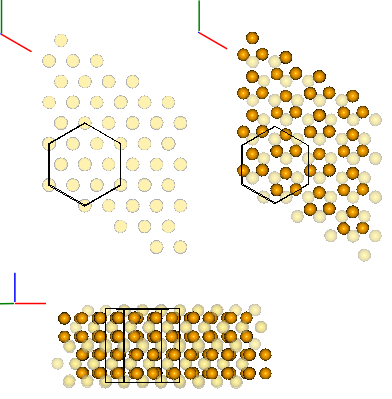

In [14]:
vis3 = ipymd.visualise_sim.Visualise_Sim()
vis3.change_atom_radiimap({'Xx':0.1})

vis3.add_axes(sim_abc,length=0.5,offset=(-0.7,0.1))

new_df = atom_manip(atom_df)
new_df.repeat_cell(sim_abc,repetitions=((-1,2),(-1,2),(0,0)))
new_df.change_variables({1:'Fe',2:'S'})
rep_df = new_df.df

new_df.slice_z(7, 10)

vis3.add_hexagon(sim_abc[[0,2]],sim_origin)

new_df.filter_variables('Fe')
vis3.add_atoms(new_df.df)
new_df.undo_last()
new_df.filter_variables('S')
vis3.add_atoms(new_df.df, alpha=0.4)

img1 = vis3.get_image(zrot=-30,fov=5)


vis3.remove_atoms(2)
new_df = atom_manip(rep_df)
new_df.change_variables({1:'Fe',2:'S'})
mid, thick = 5.9, 1.4
new_df.slice_z(mid-thick/2., mid+thick/2.)

new_df.filter_variables('Fe')
vis3.add_atoms(new_df.df)
new_df.undo_last()
new_df.filter_variables('S')
vis3.add_atoms(new_df.df, alpha=0.4, shading='toon')

img2 = vis3.get_image(zrot=-30,fov=5)

vis3.remove_atoms(2)
new_df = atom_manip(rep_df)

new_df.filter_variables('Fe')
vis3.add_atoms(new_df.df)
new_df.undo_last()
new_df.filter_variables('S')
vis3.add_atoms(new_df.df, alpha=0.4)

img3 = vis3.get_image(xrot=90,fov=5)


vis3.visualise([img2, img1, img3],columns=2)